# Algorithmes de descente en optimisation différentiable sans contrainte

Mettez ci-dessous les imports classiques de librairie Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Dans ce TP, nous nous intéressons aux algorithmes pour la minimisation sans contrainte de fonctionnelles très générales: le problème s'écrit:

$$\min_{x\in\mathbb{R}^n} f(x).$$

Le but de cette séance est l'écriture d'un code de minimisation locale, et l'évaluation de ses performances sur les fonctions tests suivantes:

<li>$f_1(x,y) = 2(x+y-2)^2+(x-y)^2$.
<li>$f_2(x,y) = 100(y-x^2)^2 + (1-x)^2$ (fonction de Rosenbrock).

On appelle $\textit{oracle}$ une routine qui à un $x$ donné, renvoie la valeur $f(x)$ du critère, le gradient $\nabla f(x)$ (ou une approximation du gradient) s'il existe, et éventuellement la matrice Hessienne $H[f](x)$ (ou une approximation) si elle existe et si nécessaire:

$$[f(x),\nabla f(x),H[f](x)] = \textrm{oracle}(x)$$

> **A faire :** Calculer les gradients et les Hessiennes des deux fonctions proposées et implémenter les fonctions $\textrm{oracle}$ correspondantes.

>**Réponse :** 

In [2]:
def oracle1(x):
    x1 = x[0]
    x2 = x[1]
    
    f = 2*(x1+x2-2)**2+(x1-x2)**2
    df = np.array([6*x1+2*x2-8, 2*x1+6*x2-8])
    Hf = np.array([[6, 2], [2, 6]])
    
    return f,df,Hf

def oracle2(x):
    x1 = x[0]
    x2 = x[1]
    
    f = 100*(x2-x1**2)**2+(1-x1)**2
    df = np.array([(-400*x1*x2)+400*x1**3+2*x1-2, 200*x2-200*x1**2])
    Hf = np.array([[-400*x2+1200*x1**2+2, -400*x1], [-400*x1, 200]])
    return f,df,Hf

On rappelle qu'un algorithme de descente appliqué à la minimisation de $f$ possède la forme suivante:

* **Données :** $x_0\in \mathbb{R}^n$ point initial arbitraire, un oracle.
* **Initialisation :** Numéro d'itération: $k=0$.
* **Tant que** le critère d'arrêt n'est pas satisfait, **faire**
  * Calcul de la direction de descente $d_k$.
  * Choix/Calcul du pas $s_k$.
  * Mise à jour: calcul du prochain itéré $x_{k+1}$.
  * $k = k + 1.$

> **A faire :** Résolution mathématique:

1. Donner les points critiques des fonctions proposées.
2. Les fonctions $f_i$ admettent-elles des extrema sur $\mathbb{R}^2$?

>**Réponse :**

> **A faire :** Implémenter deux algorithmes de mimimisation, un par méthode de gradient à pas fixe et l'autre par une méthode de Newton locale. Les arguments d'entrée sont $\textrm{function}$ qui est l'oracle à minimiser, $\textrm{xini}$ qui est le point initial et $\textrm{h}$ qui est le pas de la méthode de gradient. Les arguments de sortie sont $\textrm{x}$ la valeur finale du point trouvée, $\textrm{xiter}$ qui est la valeur du point au cours des itérations et $\textrm{iter}$ le nombre d'itérations pour arriver à convergence.

In [3]:
def Gradient(function,h=1e-1,xini=np.array([0,0])):
    iter = 0
    x = xini
    xiter = [x]
    df = function(x)[1]
    
    while np.linalg.norm(df)>10e-10 and iter<100 : 
        x = x+h*(-function(x)[1])
        df = function(x)[1]
        xiter.append(x)
        iter = iter+1
    
    return x,np.array(xiter),iter

In [4]:
def Newton(function,xini=np.array([0,0])):
    iter = 0
    x = xini
    xiter = [x]
    df = function(x)[1]
    Hf = function(x)[2]
    
    while np.linalg.norm(df)>10e-10 and iter<100 :
        x = x - np.dot(np.linalg.inv(Hf),df)
        df = function(x)[1]
        Hf = function(x)[2]
        xiter.append(x)
        iter = iter+1
    
    return x,np.array(xiter),iter

print(Newton(oracle2))

(array([1., 1.]), array([[0., 0.],
       [1., 0.],
       [1., 1.]]), 2)


> **A faire :** En utilisant le module $\textrm{matplotlib.pyplot}$, on veut représenter/dessiner la suite des itérés dans $\mathbb{R}^2$ avec la fonction $\textrm{scatter}$.On souhaite aussi représenter les fonctions $f_1$ et $f_2$ en utilisant la fonction $\textrm{contour}$ du module $\textrm{matplotlib.pyplot}$. On s'inspirera du code qui suit pour créer deux fonctions (une pour chaque oracle) $\textrm{affichage1(xiter)}$ et $\textrm{affichage2(xiter)}$ qui affiche représente les itérations.

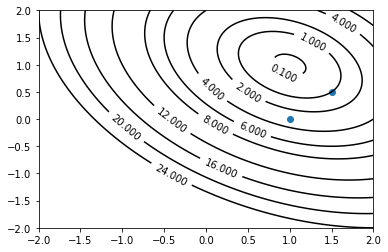

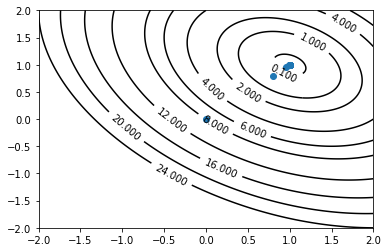

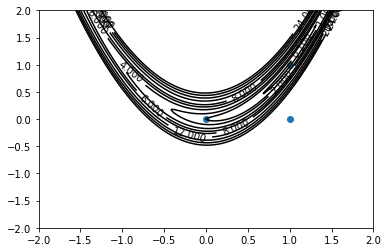

In [5]:
Nx = 1000
Ny = 1000
x = np.linspace(-2,2,Nx)
y = np.linspace(-2,2,Ny)
X, Y = np.meshgrid(x, y)
Z = 2*(X+Y-2)**2+(X-Y)**2
CS=plt.contour(X, Y, Z,[0,0.1,1,2,4,6,8,12,16,20,24],colors='k')
plt.clabel(CS, inline=1, fontsize=10)
z = [[1,1.5],[0,0.5]]
plt.scatter(z[0],z[1],marker='o')
plt.show()

def affichage1(xiter) :
    Nx = 1000
    Ny = 1000
    x = np.linspace(-2,2,Nx)
    y = np.linspace(-2,2,Ny)
    X, Y = np.meshgrid(x, y)
    Z = 2*(X+Y-2)**2+(X-Y)**2
    CS=plt.contour(X, Y, Z,[0,0.1,1,2,4,6,8,12,16,20,24],colors='k')
    plt.clabel(CS, inline=1, fontsize=10)
    z = xiter
    plt.scatter(z[:,0],z[:,1],marker='o')

def affichage2(xiter) :
    Nx = 1000
    Ny = 1000
    x = np.linspace(-2,2,Nx)
    y = np.linspace(-2,2,Ny)
    X, Y = np.meshgrid(x, y)
    Z = 100*(Y-X**2)**2+(1-X)**2
    CS=plt.contour(X, Y, Z,[0,0.1,1,2,4,6,8,12,16,20,24],colors='k')
    plt.clabel(CS, inline=1, fontsize=10)
    z = xiter
    plt.scatter(z[:,0],z[:,1],marker='o')
    
affichage1(Gradient(oracle1)[1])
plt.show()
affichage2(Newton(oracle2)[1])
plt.show()

Tester la méthode de Newton et la méthode de gradient pour différents points de départ et différents pas pour la fonction oracle1. Conclure